### 1-3 Classifier Algorhithms

In [1]:
import sys
from class_vis import prettyPicture, output_image
from prep_terrain_data import makeTerrainData
from time import time

%matplotlib inline 
import matplotlib.pyplot as plt


import numpy as np
import pylab as pl


features_train, labels_train, features_test, labels_test = makeTerrainData()

#### 1 Naive Bayes

In [2]:
from classifyNB import classify_nb, NBAccuracy

In [3]:
clf = classify_nb(features_train, labels_train)

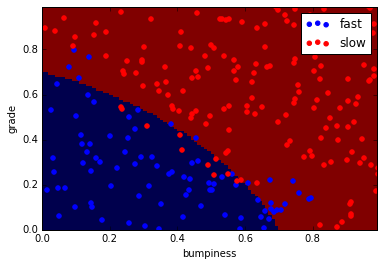

In [4]:
prettyPicture(clf, features_test, labels_test)
#output_image("testTD.png", "png", open("test.png", "rb").read())

In [5]:
print NBAccuracy(features_train, labels_train, features_test, labels_test)

0.884


#### 2 SVM

In [6]:
from classifySVM import classify_svm, SVMAccuracy

In [7]:
clf = classify_svm(features_train, labels_train)

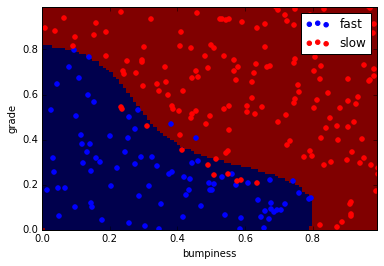

In [8]:
prettyPicture(clf, features_test, labels_test)
#output_image("testTD.png", "png", open("test.png", "rb").read())

In [9]:
print SVMAccuracy(features_train, labels_train, features_test, labels_test)

0.932


#### 3 Decision tree

In [10]:
from classifyDT import classify_dt, DTAccuracy

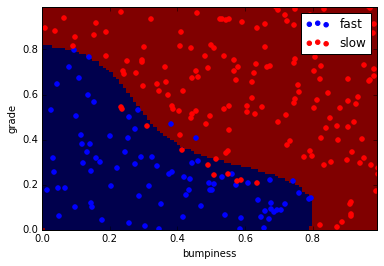

In [11]:
prettyPicture(clf, features_test, labels_test)
#output_image("testTD.png", "png", open("test.png", "rb").read())

In [12]:
print DTAccuracy(features_train, labels_train, features_test, labels_test)

0.912


#### 4 Pick your own algorhithm: Random Forest

In [13]:
from classifyRF import classify_rf, RFAccuracy

In [14]:
clf = classify_rf(features_train, labels_train)

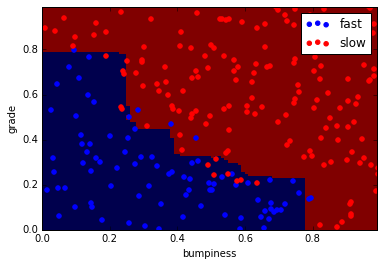

In [15]:
prettyPicture(clf, features_test, labels_test)
#output_image("testTD.png", "png", open("test.png", "rb").read())

In [16]:
print RFAccuracy(features_train, labels_train, features_test, labels_test)

0.924


### 5 Datasets and Questions

see "Datasets and Questions (Lesson 5).ipynb"

### 6 Continuous Predictions: Regression

In [17]:
from ages_net_worths import ageNetWorthData
from studentRegression import studentReg

ages_train, ages_test, net_worths_train, net_worths_test = ageNetWorthData()

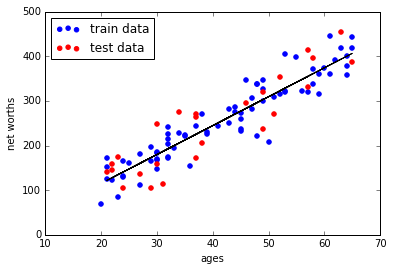

In [18]:
reg = studentReg(ages_train, net_worths_train)

plt.scatter(ages_train, net_worths_train, color="b", label="train data")
plt.scatter(ages_test, net_worths_test, color="r", label="test data")
plt.plot(ages_test, reg.predict(ages_test), color="black")
plt.legend(loc=2)
plt.xlabel("ages")
plt.ylabel("net worths")
plt.show()

In [19]:
print "Katie's net worth prediction:", reg.predict([[27]])[0][0]
print "Slope:", reg.coef_[0][0]
print "Intercept:", reg.intercept_[0]
print "r-squared for training data:", reg.score(ages_train, net_worths_train)
print "r-squared for test data:", reg.score(ages_test, net_worths_test)

Katie's net worth prediction: 160.432054531
Slope: 6.47354954958
Intercept: -14.3537833078
r-squared for training data: 0.874588235822
r-squared for test data: 0.812365729231


#### Mini-Project 

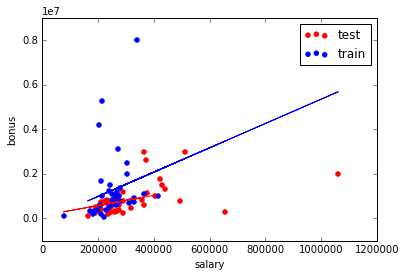

Coefficient: 2.27410114127
Intercept: 124444.388866
Comparing regression predictions with target values using *training data* (i.e., how not to do it):  -0.123597985403
Comparing regression predictions with target values using *test data*:  0.251488150398


In [33]:
# %load "../ud120-files/regression/finance_regression.py"
import sys
import pickle
sys.path.append("../ud120-files/tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../ud120-files/final_project/final_project_dataset_modified.pkl", "r") )

### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
#features_list = ["bonus", "long_term_incentive"] ## Q2
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
reg = studentReg(feature_train, target_train)



### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass
### Q3 Add regression line for test dataset
reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="r")

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

print "Coefficient:", reg.coef_[0]
print "Intercept:", reg.intercept_

print "Comparing regression predictions with target values using *training data* (i.e., how not to do it): ", \
        reg.score(feature_train, target_train)

print "Comparing regression predictions with target values using *test data*: ", \
        reg.score(feature_test, target_test)
    
#%save "../ud120-files/regression/finance_regression.py" 20


### 7 Outlier Detection

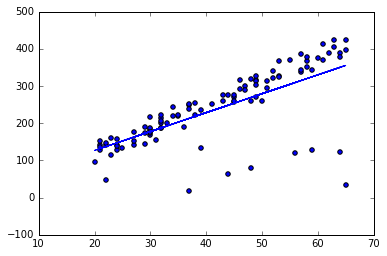

Slope is [ 5.07793064]
Score is 0.878262470366
Remove 10% Outliers:


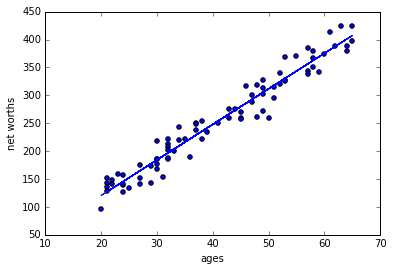

New slope is [ 6.36859481]
New score is 0.983189455396
File `../ud120-files/outliers/outlier_removal_regression.py` exists. Overwrite (y/[N])?  y
The following commands were written to file `../ud120-files/outliers/outlier_removal_regression.py`:
# %load "../ud120-files/outliers/outlier_removal_regression.py"
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("../ud120-files/outliers/practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("../ud120-files/outliers/practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net

In [31]:
# %load "../ud120-files/outliers/outlier_removal_regression.py"
#!/usr/bin/python

import random
import numpy
import matplotlib.pyplot as plt
import pickle

from outlier_cleaner import outlierCleaner


### load up some practice data with outliers in it
ages = pickle.load( open("../ud120-files/outliers/practice_outliers_ages.pkl", "r") )
net_worths = pickle.load( open("../ud120-files/outliers/practice_outliers_net_worths.pkl", "r") )



### ages and net_worths need to be reshaped into 2D numpy arrays
### second argument of reshape command is a tuple of integers: (n_rows, n_columns)
### by convention, n_rows is the number of data points
### and n_columns is the number of features
ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))
from sklearn.cross_validation import train_test_split
ages_train, ages_test, net_worths_train, net_worths_test = train_test_split(ages, net_worths, test_size=0.1, random_state=42)

### fill in a regression here!  Name the regression object reg so that
### the plotting code below works, and you can see what your regression looks like
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(ages_train, net_worths_train)

try:
    plt.plot(ages, reg.predict(ages), color="blue")
except NameError:
    pass
plt.scatter(ages, net_worths)
plt.show()

# Print out some statistics
print "Slope is", reg.coef_[0]
print "Score is", reg.score(ages_test, net_worths_test)

print "Remove 10% Outliers:"
### identify and remove the most outlier-y points
cleaned_data = []
try:
    predictions = reg.predict(ages_train)
    cleaned_data = outlierCleaner( predictions, ages_train, net_worths_train )
except NameError:
    print "your regression object doesn't exist, or isn't name reg"
    print "can't make predictions to use in identifying outliers"



### only run this code if cleaned_data is returning data
if len(cleaned_data) > 0:
    ages, net_worths, errors = zip(*cleaned_data)
    ages       = numpy.reshape( numpy.array(ages), (len(ages), 1))
    net_worths = numpy.reshape( numpy.array(net_worths), (len(net_worths), 1))

    ### refit your cleaned data!
    try:
        reg = reg.fit(ages, net_worths)
        plt.plot(ages, reg.predict(ages), color="blue")

    except NameError:
        print "you don't seem to have regression imported/created,"
        print "   or else your regression object isn't named reg"
        print "   either way, only draw the scatter plot of the cleaned data"
    plt.scatter(ages, net_worths)
    plt.xlabel("ages")
    plt.ylabel("net worths")
    plt.show()


else:
    print "outlierCleaner() is returning an empty list, no refitting to be done"

### Print new statistics
print "New slope is", reg.coef_[0]
print "New score is", reg.score(ages_test, net_worths_test)

%save "../ud120-files/outliers/outlier_removal_regression.py" 29

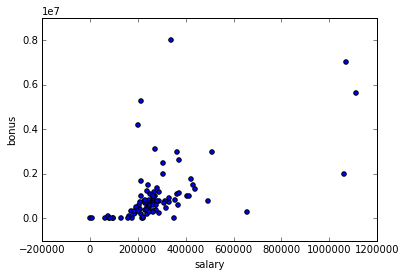

8000000.0
File `../ud120-files/outliers/enron_outliers.py` exists. Overwrite (y/[N])?  y
The following commands were written to file `../ud120-files/outliers/enron_outliers.py`:
# %load "../ud120-files/outliers/enron_outliers.py"
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../ud120-files/tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../ud120-files/final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]

### Remove 'Total' line
data_dict.pop('TOTAL')

data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

print data.max()
# %save "../ud120-files/outliers/enron_outliers.py"


In [61]:
# %load "../ud120-files/outliers/enron_outliers.py"
#!/usr/bin/python

import pickle
import sys
import matplotlib.pyplot
sys.path.append("../ud120-files/tools/")
from feature_format import featureFormat, targetFeatureSplit


### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../ud120-files/final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]

### Remove 'Total' line
data_dict.pop('TOTAL')

data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

print data.max()

#%save "../ud120-files/outliers/enron_outliers.py" 57

In [59]:
outliers = []
for key in data_dict:
    val = data_dict[key]['salary']
    if val == 'NaN':
        continue
    outliers.append((key,int(val)))

print(sorted(outliers,key=lambda x:x[1],reverse=True)[:2])

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321)]


### 8 K-means Clustering

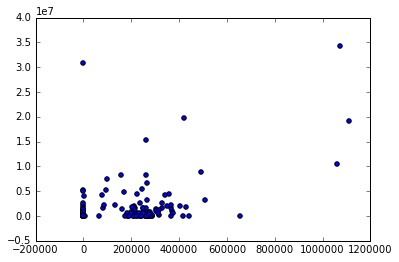

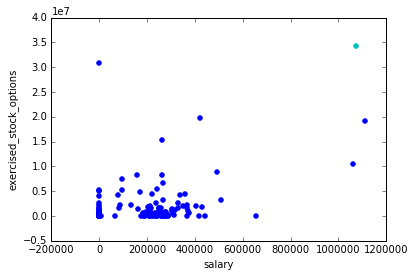

In [67]:
# %load "../ud120-files/k_means/k_means_cluster.py"
#!/usr/bin/python 

import pickle
import numpy
import matplotlib.pyplot as plt
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit


def Draw(pred, features, poi, mark_poi=False, name="image.png", f1_name="feature 1", f2_name="feature 2"):
    """ some plotting code designed to help you visualize your clusters """

    ### plot each cluster with a different color--add more colors for
    ### drawing more than five clusters
    colors = ["b", "c", "k", "m", "g"]
    for ii, pp in enumerate(pred):
        plt.scatter(features[ii][0], features[ii][1], color = colors[pred[ii]])

    ### if you like, place red stars over points that are POIs (just for funsies)
    if mark_poi:
        for ii, pp in enumerate(pred):
            if poi[ii]:
                plt.scatter(features[ii][0], features[ii][1], color="r", marker="*")
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.savefig(name)
    plt.show()



### load in the dict of dicts containing all the data on each person in the dataset
data_dict = pickle.load( open("../ud120-files/final_project/final_project_dataset.pkl", "r") )
### there's an outlier--remove it! 
data_dict.pop("TOTAL", 0)


### the input features we want to use 
### can be any key in the person-level dictionary (salary, director_fees, etc.) 
feature_1 = "salary"
feature_2 = "exercised_stock_options"
feature_3 = "total_payments"    # added for Q2
poi  = "poi"
#features_list = [poi, feature_1, feature_2]
features_list = [poi, feature_1, feature_2, feature_3] # added for Q2
data = featureFormat(data_dict, features_list )
poi, finance_features = targetFeatureSplit( data )


### in the "clustering with 3 features" part of the mini-project,
### you'll want to change this line to 
### for f1, f2, _ in finance_features:
### (as it's currently written, the line below assumes 2 features)
#for f1, f2 in finance_features:
#    plt.scatter( f1, f2 )
#plt.show()

### Changed code for "clustering with 3 features" part
for f1, f2, f3 in finance_features:
    plt.scatter( f1, f2 )
plt.show()

### cluster here; create predictions of the cluster labels
### for the data and store them to a list called pred
from sklearn.cluster import KMeans
clf = KMeans(n_clusters = 2)
pred = clf.fit_predict(finance_features)



### rename the "name" parameter when you change the number of features
### so that the figure gets saved to a different file
try:
    Draw(pred, finance_features, poi, mark_poi=False, name="clusters.pdf", f1_name=feature_1, f2_name=feature_2)
except NameError:
    print "no predictions object named pred found, no clusters to plot"


In [74]:
stockoptions = []
for name in data_dict:
    try:
        int(data_dict[name]['salary'])  # changed from exercised_stock_options 
        stockoptions.append(data_dict[name]['salary'])  # changed from exercised_stock_options  
    except:
        continue

print max(stockoptions)
print min(stockoptions)

1111258
477
